In [33]:
# Import basic libraries
from palmerpenguins import load_penguins
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import time
from sklearn.preprocessing import LabelEncoder
import os
os.chdir("/Users/hoangthuyduongvu/Desktop/FuzzSIM")


In [34]:
# Import personalized libraries
from fuzz.src.capacity import *
from fuzz.choquet.choquet import *
from fuzz.src.norm import *
from fuzz.src.knn import KNNFuzz
from fuzz.src.sim import S1, S2, S3
from fuzz.optim import *
from fuzz.utils import *
from fuzz.eval import leave_one_out
from fuzz.dataloader import *
from fuzz.choquet.d_choquet import *

In [35]:
# Load data 
# iris_data = load_iris()
# iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
# iris['target'] = iris_data.target
# data, labels = iris.iloc[:, :-1].values, iris.iloc[:, -1].values
# data = batch_norm(np.array(data, dtype=np.float32))

data, labels = dynamic_generate_positive_gaussian_data(
    dim=3,
    nb_classes=3,
    nb_points_per_class=100,
    seed=42
)
data = batch_norm(data)
data[:5]

array([[0.        , 1.        , 0.01959192],
       [1.        , 0.        , 0.4070175 ],
       [0.        , 0.38090406, 1.        ],
       [0.6965442 , 0.        , 1.        ],
       [0.        , 1.        , 0.99405304]])

In [36]:
# features = data[0]

# mobius = generate_mobius(features, 2)
# mobius.pop(0)
# print(len(mobius))
# capacity = mobius_to_capacity(mobius, features)

# print("Möbius:")
# for i in range(len(mobius)):
#     print(f"Mobius of {mobius[i].X} is {mobius[i].mu:.3f}")

# print("\nDerived Capacity:")
# for c in capacity:
#     print(f"Capacity of {c.X} is {c.mu:.3f}")


In [37]:
# mutated_mobius = mutate(mobius, mutation_rate=0.2)
# print("\nMutated Möbius:")
# for i in range(len(mutated_mobius)):
#     print(f"Mobius of {mutated_mobius[i].X} is {mutated_mobius[i].mu:.3f}")

In [56]:
# Generate all possible mobius for training
features = list(range(len(data[0])))    # encode features as integers

nb_total = 10

# Input Mobius (10 mobius currently)
lst_mobius = []
for i in range(nb_total):
    mobius = generate_mobius(features, 2)
    mobius.pop(0)
    lst_mobius.append(mobius)

# Mutate all mobius
mutated = []
for i in range(len(lst_mobius)):
    mobius = lst_mobius[i]
    mutated_mobius = mutate(mobius, mutation_rate=0.8)
    mutated.append(mutated_mobius)

# Add mutated mobius to the list
lst_mobius.extend(mutated)

# Cross over all mobius
crossed_over = []
for i in range(len(lst_mobius)):
    for j in range(i + 1, len(lst_mobius) // 2):
        crossed = crossover(lst_mobius[i], lst_mobius[j])
        crossed_over.append(crossed)

# Add crossed over mobius to the list
lst_mobius.extend(crossed_over)
print(f"Total number of Möbius measures: {len(lst_mobius)}")

# Convert all Möbius measures to capacities
capacities_list = []
for i in range(len(lst_mobius)):
    mobius = lst_mobius[i]
    capacity = mobius_to_capacity(mobius, features)
    capacities_list.append(capacity)    
print('Test Möbius measures completed!')
print(f"Total number of capacities: {len(capacities_list)}")

Total number of Möbius measures: 65
Test Möbius measures completed!
Total number of capacities: 65


In [57]:
for i in range(5):
    mobius = lst_mobius[i]
    tmp = [mobius[j].mu for j in range(len(mobius))]
    print(f"Mobius {i + 1}: {tmp}")

Mobius 1: [0.25813343270112754, 0.6567366645412922, 0.3251900642246949, 0.7734731256866006, 0.13087366071834983, 0.9698210450785447]
Mobius 2: [0.45378954138363925, 0.23605046334646396, 0.07349674733001266, 0.16975790508754074, 0.5197739485560177, 0.3370031764312863]
Mobius 3: [0.8288833658826095, 0.43088752366180594, 0.2487142725876299, 0.61714498660403, 0.7067772168854458, 0.16704190790094986]
Mobius 4: [0.16761921628831766, 0.03667142693354297, 0.7364020150656405, 0.6638045276218051, 0.4746308757498139, 0.8441704489691971]
Mobius 5: [0.8056701529500532, 0.5853543643967521, 0.8682712805132586, 0.20584121003676825, 0.11191961939772788, 0.2697496115169896]


In [58]:
for i in range(5):
    mobius = capacities_list[i]
    tmp = [mobius[j].mu for j in range(len(mobius))]
    print(f"Mobius {i + 1}: {tmp}")

# All different capacities

Mobius 1: [np.float64(0.0), np.float64(0.08288841834491255), np.float64(0.21088265407281875), np.float64(0.10442076333550322), np.float64(0.542138606020743), np.float64(0.22933361310117123), np.float64(0.62671961663132), np.float64(1.0)]
Mobius 2: [np.float64(0.0), np.float64(0.25353187078146944), np.float64(0.13188121389617236), np.float64(0.04106257669605008), np.float64(0.4802566968189838), np.float64(0.5849917562367151), np.float64(0.3612272083179931), np.float64(1.0)]
Mobius 3: [np.float64(0.0), np.float64(0.27634518549773357), np.float64(0.14365554619157916), np.float64(0.0829199796053049), np.float64(0.6257534983894717), np.float64(0.5949008276643278), np.float64(0.28226638524081804), np.float64(1.0)]
Mobius 4: [np.float64(0.0), np.float64(0.05733906943779427), np.float64(0.012544537206931022), np.float64(0.25190790895568255), np.float64(0.29695741563425976), np.float64(0.4716083910320374), np.float64(0.5532257089341106), np.float64(1.0)]
Mobius 5: [np.float64(0.0), np.float64(0

In [59]:
mobius = lst_mobius[0]
print("Möbius:")
for i in range(len(mobius)):
    print(f"Mobius of {mobius[i].X} is {mobius[i].mu:.3f}")

capacity = capacities_list[0]
print("\nDerived Capacity:")
for c in capacity:
    print(f"Capacity of {c.X} is {c.mu:.3f}")


Möbius:
Mobius of [0] is 0.258
Mobius of [1] is 0.657
Mobius of [2] is 0.325
Mobius of [0, 1] is 0.773
Mobius of [0, 2] is 0.131
Mobius of [1, 2] is 0.970

Derived Capacity:
Capacity of [] is 0.000
Capacity of [0] is 0.083
Capacity of [1] is 0.211
Capacity of [2] is 0.104
Capacity of [0, 1] is 0.542
Capacity of [0, 2] is 0.229
Capacity of [1, 2] is 0.627
Capacity of [0, 1, 2] is 1.000


In [60]:
import copy

In [ ]:
C = KNNFuzz(input_dimension = data.shape[1], mu=mobius, sim=S1, choquet_version='linear', p=1, q=2)
C.train(data, labels)
C.score(data[0])

np.int64(0)

In [62]:
# # Fuzzy verion
# def FuzzLOO(DS, mu, sim = S1, choquet_version='linear', p=1, q=1, time_counter=False):
#     """ Classifieur * tuple[array, array] -> float
#     """
#     ###################### A COMPLETER 
#     pt = 0
#     Xm, Ym = DS

#     input_dimension= Xm[0].shape[0]

#     C = KNNFuzz(input_dimension = input_dimension, mu=mu, sim=sim, choquet_version=choquet_version, p=p, q=q)

#     if time_counter:
#         tic = time.time()
#     for i in range(len(Xm)):
#         Xtest, Ytest = Xm[i], Ym[i]
        
#         Xapp, Yapp = np.array(list(Xm[:i])+list(Xm[i+1:])), np.array(list(Ym[:i])+list(Ym[i+1:]))

#         cl = copy.deepcopy(C)
#         cl.train(desc_set=Xapp, label_set=Yapp)

#         if cl.accuracy([Xtest], [Ytest]) == 1: pt += 1

#     if time_counter:
#         toc = time.time()
#         print(f'Result in {(toc-tic):0.4f} seconds.')
    
#     return pt/len(Xm)

In [63]:
FuzzLOO(
    # C=C,
    DS=(data, labels),
    mu=lst_mobius[64],
)

0.3433333333333333

In [64]:
def fitness_function(capacities_list: np.ndarray, DS: Tuple[np.ndarray, np.ndarray], sim = S1, choquet_version='linear', p=1, q=1, time_counter=False, verbose=False) -> np.ndarray:
    """
    Objective function for optimizing Möbius measures:
    - capacities_list: list of Möbius measures represented as capacities
    - DS: Tuple (X_data, y_data)
    - C: Choquet similarity function (e.g., Choquet_classic)
    
    Returns:
    - 1D array of negative LOO accuracy (to minimize)
    """
    results = []
    i = 0
    # Replace capacities computation with Mobius instead
    # Isolate Classifier outside please
    for capacity in capacities_list:
        i += 1
        # if not is_monotonic(capacity):
        #     results.append(float('inf'))  # Penalize non-monotonic capacity
        #     continue

        acc = FuzzLOO(DS, capacity, sim=sim, choquet_version=choquet_version, p=p, q=q, time_counter=time_counter)

        # negative accuracy for minimization
        results.append(-acc)

        if verbose: 
            print(f"Processing capacity {i}/{len(capacities_list)}...")
            tmp = [capacity[j].mu for j in range(len(capacity))]
            print(f"Capacities {i}: {tmp}")
            print(f"Accuracy: {acc:.4f}\n")

    return np.array(results)

In [65]:
FF_res = fitness_function(
    # C = C,
    capacities_list=lst_mobius,
    DS=(data, labels),
    sim=S1,
    choquet_version='linear',
    p=1,
    q=1,
    time_counter=False, 
    verbose=True
)

Processing capacity 1/65...
Capacities 1: [0.25813343270112754, 0.6567366645412922, 0.3251900642246949, 0.7734731256866006, 0.13087366071834983, 0.9698210450785447]
Accuracy: 0.2900

Processing capacity 2/65...
Capacities 2: [0.45378954138363925, 0.23605046334646396, 0.07349674733001266, 0.16975790508754074, 0.5197739485560177, 0.3370031764312863]
Accuracy: 0.2967

Processing capacity 3/65...
Capacities 3: [0.8288833658826095, 0.43088752366180594, 0.2487142725876299, 0.61714498660403, 0.7067772168854458, 0.16704190790094986]
Accuracy: 0.3633

Processing capacity 4/65...
Capacities 4: [0.16761921628831766, 0.03667142693354297, 0.7364020150656405, 0.6638045276218051, 0.4746308757498139, 0.8441704489691971]
Accuracy: 0.3667

Processing capacity 5/65...
Capacities 5: [0.8056701529500532, 0.5853543643967521, 0.8682712805132586, 0.20584121003676825, 0.11191961939772788, 0.2697496115169896]
Accuracy: 0.3333

Processing capacity 6/65...
Capacities 6: [0.05708685608931485, 0.531169528001032, 0.

In [66]:
# Get the best capacity
best_index = np.argmin(FF_res)
# Print the best index and its accuracy
print(f"Best index: {best_index}, Accuracy: {-FF_res[best_index]:.4f}")

# get best mobius
best_mobius = lst_mobius[best_index]
print(f"Best Möbius measure: {[f'{m.X}: {m.mu:.3f}' for m in best_mobius]}")

Best index: 63, Accuracy: 0.4067
Best Möbius measure: ['[0]: 0.705', '[1]: 0.202', '[2]: 0.952', '[0, 1]: 0.970', '[0, 2]: 0.094', '[1, 2]: 0.455']


In [67]:
# Convert mobius to capacity
best_capacity = mobius_to_capacity(best_mobius, features)
print("\nBest Capacity:")
for c in best_capacity:
    print(f"Capacity of {c.X} is {c.mu:.3f}")

# Evaluate the best capacity
best_accuracy = FuzzLOO(
    DS=(data, labels),
    mu=best_mobius,
    sim=S1,
    choquet_version='linear',
    p=1,
    q=1,
    time_counter=True
)
print(f"Best accuracy: {best_accuracy:.4f}")


Best Capacity:
Capacity of [] is 0.000
Capacity of [0] is 0.209
Capacity of [1] is 0.060
Capacity of [2] is 0.282
Capacity of [0, 1] is 0.556
Capacity of [0, 2] is 0.518
Capacity of [1, 2] is 0.476
Capacity of [0, 1, 2] is 1.000
Result in 5.8425 seconds.
Best accuracy: 0.4067


In [68]:
# get mobius
for i in range(len(capacities_list[best_index])):
    print(capacities_list[best_index][i].X, capacities_list[best_index][i].mu)

[] 0.0
[0] 0.2086769081604657
[1] 0.05977480373800887
[2] 0.2818597456264643
[0, 1] 0.5556714824272416
[0, 2] 0.518343445289075
[1, 2] 0.4762965298086221
[0, 1, 2] 1.0


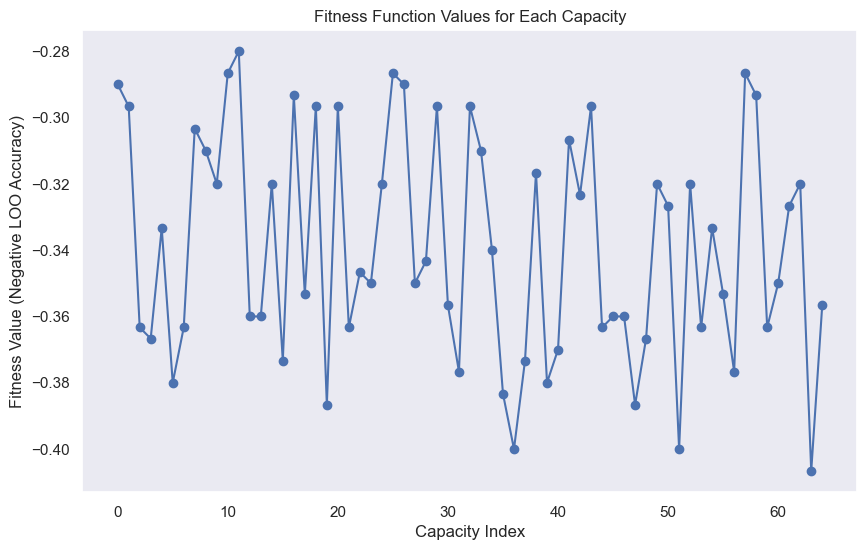

In [77]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(capacities_list)), FF_res, marker='o')
plt.title('Fitness Function Values for Each Capacity')
plt.xlabel('Capacity Index')
plt.ylabel('Fitness Value (Negative LOO Accuracy)')
plt.grid()
plt.show()